# asdfas

In [1]:
#!/usr/local/bin/env python
from __future__ import division
import time
from copy import deepcopy
import numpy as np
from numpy.random import random_sample as rs
from scipy.stats.mstats import mquantiles as mq
from radd import build, fit, vis

In [23]:
dirpath = '/home/kyle/Dropbox/ELife/XXXPro_Tr/'
if not os.path.isdir(dirpath):
      os.mkdir(dirpath)
os.chdir(dirpath)

data = prodf_store['prodata']
inits = dict(deepcopy(ttheta))
#vinits = dict(deepcopy(vtheta))
#inits['a']=np.mean([tinits['a'], vinits['a']])
#inits['z']=np.mean([tinits['z'], vinits['z']])
inits['v'] = np.mean(vopt.values())
inits['tr'] = np.mean(topt.values())
inits['xb']=2

In [24]:
m.dynamic

'hyp'

In [25]:
m.dynamic

'hyp'

In [26]:
m = build.Model(data=data, inits=inits, kind='xpro', fit_on='average', depends_on={'xb':'pGo'}, weighted=True, dynamic='exp')


      Model is prepared to fit xpro model (w/ exp dynamic bias) to average data,
      allowing Dynamic Drift to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      I wish you a merry fit, and a happy Nature paper 



In [27]:
m.optimize(ntrials=10000, ftol=1.e-20, xtol=1.e-20, maxfev=10000)
m.fitinfo

Optimization terminated successfully.
         Current function value: 0.000588
         Iterations: 482
         Function evaluations: 1292
Optimization terminated successfully.
         Current function value: 2.187659
         Iterations: 313
         Function evaluations: 830


{'AIC': -11.556257647576427,
 'BIC': -6.9207253141377407,
 'CNVRG': True,
 'a': 0.38263812892871019,
 'chi': 2.2940504027465076,
 'nfev': 830,
 'rchi': 0.22940504027465075,
 'tr': 0.32573314253976615,
 'v': 1.6395218407250962,
 'xb_0': 0.099999999367772013,
 'xb_100': 0.099934105927932435,
 'xb_20': 0.099999999367772013,
 'xb_40': 0.0999291513548657,
 'xb_60': 0.099992031908025678,
 'xb_80': 0.099963464760010862}

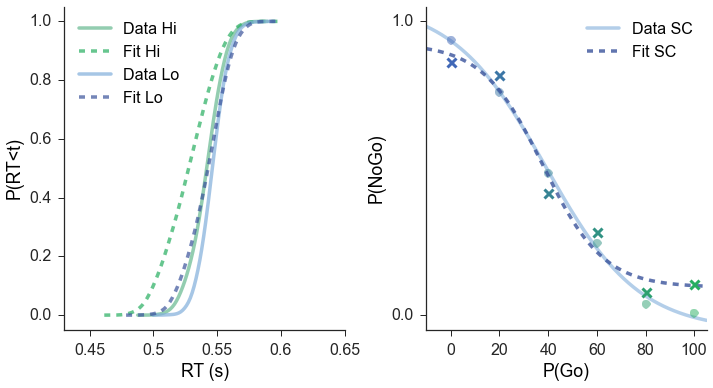

In [14]:
yhat = m.simulate()
vis.plot_fits(m.avg_y, yhat, kind='pro')

(0, 0.41716831633365214)

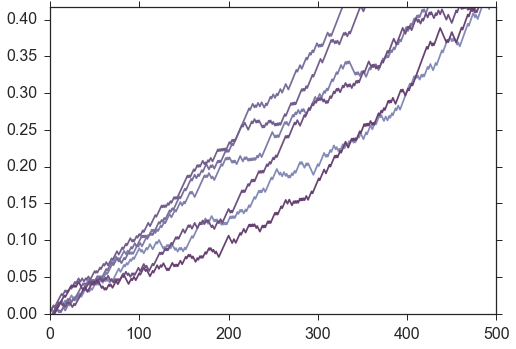

In [641]:
x=fit.Simulator(fitparams=m.fitparams, inits=m.inits, pc_map=m.pc_map, kind=m.kind)
dvg = x.simulate_xpro(m.popt)
clr = ppal(6)
for ii, i in enumerate(dvg[:, 0, :]):
      plt.plot(i, color=clr[ii])
      plt.hlines(y=m.popt['a'][0], xmin=0, xmax=len(i))
plt.gca().set_ylim(0,m.popt['a'][0])